In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
grid_size = 50
states = {'V': 0, 'H': 1, 'I': 2, 'C': 3}  # V: vacant, H: housing, I: industrial, C: commercial
 
num_iterations = 30  # Number of iterations

# Initialize the grid and counts

counts = {0: grid_size * grid_size, 1: 0, 2: 0, 3: 0}

def initial_land_use(seed_number, grid_size, plot=True):
    np.random.seed(seed_number)
    
    grid = np.zeros((grid_size, grid_size), dtype=int)

    # Define initial conditions
    center_x, center_y = grid_size // 2, grid_size // 2
    
    # Randomly select positions for commercial cells
    commercial_cells = []
    num_commercial = 3
    min_dist_commercial = 1  # Minimum distance from center
    
    while len(commercial_cells) < num_commercial:
        x = np.random.randint(center_x - min_dist_commercial, center_x + min_dist_commercial + 1)
        y = np.random.randint(center_y - min_dist_commercial, center_y + min_dist_commercial + 1)
        if (x, y) not in commercial_cells:
            commercial_cells.append((x, y))

    residential_cells = []
    num_residential = 25
    min_dist = 3  # Minimum distance from commercial cells

    industrial_cells = []
    num_industrial = 4
    min_dist_industrial = 3  # Minimum distance from commercial cells

    # Generate random residential cells around the commercial area
    while len(residential_cells) < num_residential:
        x = np.random.randint(center_x - min_dist, center_x + min_dist + 1)
        y = np.random.randint(center_y - min_dist, center_y + min_dist + 1)
        if (x, y) not in commercial_cells:
            residential_cells.append((x, y))

    # Generate random industrial cells around the commercial area
    while len(industrial_cells) < num_industrial:
        x = np.random.randint(center_x - min_dist_industrial, center_x + min_dist_industrial + 1)
        y = np.random.randint(center_y - min_dist_industrial, center_y + min_dist_industrial + 1)
        if (x, y) not in commercial_cells:
            industrial_cells.append((x, y))

    # Assign initial land use types
    for x, y in commercial_cells:
        grid[x, y] = states['C']  # Commercial
    for x, y in residential_cells:
        grid[x, y] = states['H']  # Residential
    for x, y in industrial_cells:
        grid[x, y] = states['I']  # Industrial

    if plot:
        # Set the figure size
        plt.figure(figsize=(8, 8))
        cmap = plt.cm.colors.ListedColormap(['white', 'skyblue', 'grey', 'orange'])
        plt.imshow(grid, cmap=cmap, origin='lower', vmin=0, vmax=3)
        plt.colorbar(ticks=[0, 1, 2, 3], label='Land Use')
        plt.title('Initial Land Use')
        plt.show()

    return grid



In [4]:
weights_table = {
    'Vacant_Commerce': {
        'C': [25, 25, 25, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        'I': [0]*18,
        'H': [4, 3.5, 3, 2.5, 2, 2, 2, 1.5, 1.5, 1.5, 1.5, 1, 1, 1, 1, 1, 1, 1],
        'V': [0]*18
    },
    'Vacant_Industry': {
        'C': [0]*18,
        'I': [3, 3, 2, 1, 0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2],
        'H': [-1, -1, 0] + [0]*15,
        'V': [0]*18
    },
    'Vacant_Housing': {
        'C': [-2, -1, 2, 1, 1, 1, 0.5, 0.5, 0.4, 0.3, 0.2, 0.1, 0.1, 0.1, 0, 0, 0, 0],
        'I': [-10, -10, -5, -3, -1] + [0]*13,
        'H': [2, 2, 1.5, 1.5, 1, 1, 1, 1, 0.5, 0.5, 0.5, 0.5, 0.5, 0.1, 0.1, 0.1, 0.1, 0.1],
        'V': [0]*18
    },
    'Industry_Commerce': {
        'C': [25, 25, 25, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2],
        'I': [-2, -2, -2] + [0]*15,
        'H': [4, 3.5, 3, 2.5, 2, 2, 2, 1.5, 1.5, 1.5, 1.5, 1, 1, 1, 1, 1, 1, 1],
        'V': [0]*18
    },
    'Industry_Industry': {
        'C': [0]*18,
        'I': [0]*18,
        'H': [0]*18,
        'V': [0]*18
    },
    'Industry_Housing': {
        'C': [0]*18,
        'I': [0]*18,
        'H': [0]*18,
        'V': [0]*18
    },
    'Housing_Commerce': {
        'C': [25, 25, 25, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2],
        'I': [-10, -10, -5, -3, -1] + [0]*13,
        'H': [4, 3.5, 3, 2.5, 2, 2, 2, 1.5, 1.5, 1.5, 1.5, 1, 1, 1, 1, 1, 1, 1],
        'V': [0]*18
    },
    'Housing_Industry': {
        'C': [0]*18,
        'I': [3, 3, 2, 1, 0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2],
        'H': [-1, -1, 0] + [0]*15,
        'V': [0]*18
    },
    'Housing_Housing': {
        'C': [0]*18,
        'I': [0]*18,
        'H': [0]*18,
        'V': [0]*18
    },
}

# Test of accessing a weight:
transition = 'Vacant_Commerce'
cell_type = 'H'
distance_zone = 1
# This is distance zone is from 0 to 17
weight = weights_table[transition][cell_type][distance_zone]
print(f"The weight for transition={transition}, cell_type={cell_type}, distance_zone={distance_zone} is {weight}")


The weight for transition=Vacant_Commerce, cell_type=H, distance_zone=1 is 3.5


In [5]:

def get_distance_zone(distance):
    zone_mapping = {0: 1, 1: 1.4, 2: 2, 3: 2.2, 4: 2.8, 5: 3, 6: 3.2, 7: 3.6, 8: 4, 9: 4.1, 10: 4.2, 11: 4.5, 12: 5, 13: 5.1, 14: 5.4, 15: 5.7, 16: 5.8, 17: 6}
    for zone, max_distance in reversed(list(zone_mapping.items())):
        if distance >= max_distance:
            return zone
    return 0  # Return 0 if distance is less than the minimum specified distance

def get_neighbourhood(grid, row, col, radius):
    rows, cols = grid.shape
    square_row_range = range(max(0, row - radius), min(rows, row + radius + 1))
    square_col_range = range(max(0, col - radius), min(cols, col + radius + 1))
    square_neighbourhood = grid[np.ix_(square_row_range, square_col_range)]
    circle_mask = np.zeros_like(square_neighbourhood, dtype=bool)
    distance_zones = np.zeros_like(square_neighbourhood, dtype=int)
    # Adjusted center coordinates inside the neighbourhood
    center = min(row, radius), min(col, radius)
    for i in range(square_neighbourhood.shape[0]):
        for j in range(square_neighbourhood.shape[1]):
            distance = np.sqrt((center[0] - i) ** 2 + (center[1] - j) ** 2)
            if distance <= radius:
                circle_mask[i, j] = True
                distance_zones[i, j] = get_distance_zone(distance)
    circle_mask[center] = False  # Exclude the center cell
    return square_neighbourhood[circle_mask], distance_zones[circle_mask]




def cell_type_to_states(state):
    if state == 'Vacant':
        return 0
    elif state == 'Housing':
        return 1
    elif state == 'Industry':
        return 2
    elif state == 'Commerce':
        return 3

def states_to_cell_type(state):
    if state == 0:
        return 'V'
    elif state == 1:
        return 'H'
    elif state == 2:
        return 'I'
    elif state == 3:
        return 'C'


def calculate_transition_potentials(grid, alpha, weights_table, radius):
    transition_potentials = np.zeros((grid.shape[0], grid.shape[1], 4))  # 4 possible states
    transitions = ['Vacant_Commerce', 'Vacant_Industry', 'Vacant_Housing', 'Industry_Commerce', 'Industry_Industry',
                   'Industry_Housing', 'Housing_Commerce', 'Housing_Industry', 'Housing_Housing']
    
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            neighbourhood, distance_zones = get_neighbourhood(grid, i, j, radius)
            for transition in transitions:
                # Extract the current state and desired state from the transition string
                current_state, desired_state = transition.split('_')
                
                current_state_num = cell_type_to_states(current_state)
                desired_state_num = cell_type_to_states(desired_state)
                
            
                if grid[i, j] == current_state_num:
                    sum_weights = 0
                    for neighbor_state, distance_zone in zip(neighbourhood, distance_zones):
                        
                        neighbor_type = states_to_cell_type(neighbor_state)
                        
                        m_kd = weights_table[transition][neighbor_type][distance_zone]

                        if neighbor_state == desired_state_num:
                            sum_weights += m_kd

                    
                    R = np.random.uniform(0, 1)
                    S = 1 + (-math.log(R))**alpha
                    transition_potentials[i, j, desired_state_num] = S * (1 + sum_weights)
    return transition_potentials







In [6]:
test_grid = np.array([
    [3, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 1, 2, 1, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0],
])


alpha = 1

transition_potentials_test = calculate_transition_potentials(test_grid, alpha, weights_table, 2)
print("Transition Potentials:")
print(transition_potentials_test)




Transition Potentials:
[[[ 0.          0.          0.          0.        ]
  [ 0.          7.66412404  1.1492719  33.0375949 ]
  [ 0.          8.36355251  3.92407208 67.73659871]
  [ 0.          7.44688104  3.00485313  1.55827032]
  [ 0.          5.40999165  1.31706866  1.46587167]]

 [[ 0.         12.17722791  1.2354498  38.67326568]
  [ 0.          1.15400307  4.01855482 29.61557177]
  [ 0.          2.70987743  9.04221341  4.02018082]
  [ 0.          3.56104398  4.47710226  1.31769472]
  [ 0.         15.52900955  3.04937292  2.96896655]]

 [[ 0.          8.24161737  4.50751349 29.85909253]
  [ 0.          1.56652708  4.89764101  1.4996841 ]
  [ 0.          1.13115304  1.37908236  1.30713336]
  [ 0.          4.61432891  4.94535355  2.43079958]
  [ 0.         13.09875327  5.71605564  2.74434956]]

 [[ 0.         12.98097981  2.11996323  1.46455987]
  [ 0.          1.94104736 17.33417687  2.95850682]
  [ 0.          1.46969506 10.09147309  1.17374498]
  [ 0.          2.18978164  4.08672

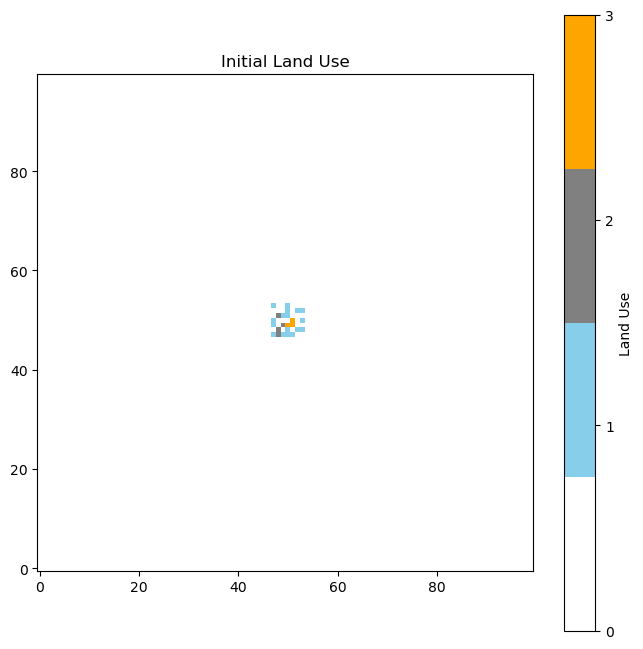

Initial counts: {0: 9976, 1: 17, 2: 4, 3: 3}
Running iteration 1...
Counts at iteration 1: {0: 9856, 1: 114, 2: 24, 3: 6}
Running iteration 2...
Counts at iteration 2: {0: 9735, 1: 213, 2: 43, 3: 9}
Running iteration 3...
Counts at iteration 3: {0: 9615, 1: 311, 2: 62, 3: 12}
Running iteration 4...
Counts at iteration 4: {0: 9494, 1: 409, 2: 82, 3: 15}
Running iteration 5...
Counts at iteration 5: {0: 9372, 1: 508, 2: 102, 3: 18}
Running iteration 6...
Counts at iteration 6: {0: 9253, 1: 605, 2: 121, 3: 21}
Running iteration 7...
Counts at iteration 7: {0: 9136, 1: 699, 2: 141, 3: 24}
Running iteration 8...
Counts at iteration 8: {0: 9017, 1: 796, 2: 160, 3: 27}
Running iteration 9...
Counts at iteration 9: {0: 8898, 1: 893, 2: 179, 3: 30}
Running iteration 10...
Counts at iteration 10: {0: 8777, 1: 991, 2: 199, 3: 33}
Running iteration 11...
Counts at iteration 11: {0: 8659, 1: 1087, 2: 218, 3: 36}
Running iteration 12...
Counts at iteration 12: {0: 8540, 1: 1183, 2: 238, 3: 39}
Runni

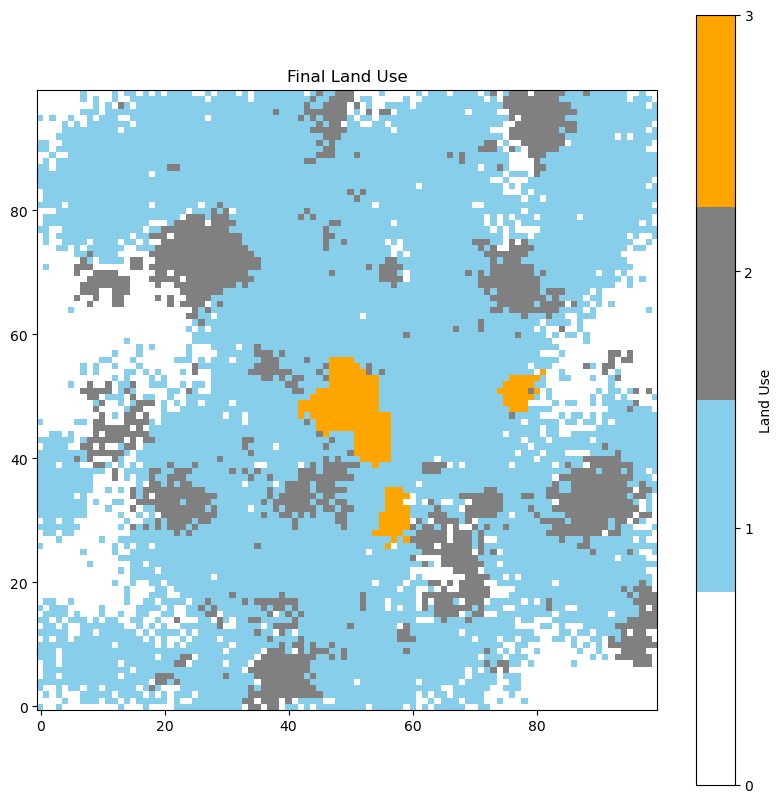

In [13]:
def run_simulation(grid, weights_table, alpha, growth_rates, radius, seed, num_iterations):
    np.random.seed(seed)
    grid_size = grid.shape[0]
    

    counts = {0: 0, 1: 0, 2: 0, 3: 0}
    for i in range(grid_size):
        for j in range(grid_size):
            counts[grid[i, j]] += 1

    print(f"Initial counts: {counts}")

    for iteration in range(num_iterations):
        print(f"Running iteration {iteration+1}...")
        transition_potentials = calculate_transition_potentials(grid, alpha, weights_table, radius)

        highest_potentials = {}
        for i in range(grid_size):
            for j in range(grid_size):
                if grid[i, j] == states['V']:
                    potential_states = ['H', 'I', 'C']
                elif grid[i, j] == states['H']:
                    potential_states = ['I', 'C']
                elif grid[i, j] == states['I']:
                    potential_states = ['C']
                else:
                    potential_states = []
                    
                if potential_states:
                    highest_potentials[(i, j)] = max(potential_states, key=lambda state: transition_potentials[i, j, states[state]])

        for new_state_key in sorted(states, key=lambda k: states[k], reverse=True):
            new_state = states[new_state_key]
            if new_state_key != 'V':
                num_to_convert = int(grid_size * grid_size * growth_rates[new_state_key])
                potential_cells = [(i, j) for i, j in highest_potentials.keys() if highest_potentials[(i, j)] == new_state_key]
                potential_cells.sort(key=lambda cell: transition_potentials[cell[0], cell[1], states[highest_potentials[cell]]], reverse=True)
                
                for cell in potential_cells[:num_to_convert]:
                    counts[grid[cell]] -= 1
                    counts[new_state] += 1
                    grid[cell] = new_state

        print(f"Counts at iteration {iteration+1}: {counts}")

    plt.figure(figsize=(10, 10))
    cmap = plt.cm.colors.ListedColormap(['white', 'skyblue', 'grey', 'orange'])
    plt.imshow(grid, cmap=cmap, origin='lower', vmin=0, vmax=3)
    plt.colorbar(ticks=[0, 1, 2, 3], label='Land Use')
    plt.title('Final Land Use')
    plt.show()


growth_rates = {
    'H': 0.01,  
    'I': 0.002,
    'C': 0.00035,
}


num_iterations = 70
# Run the simulation
grid = initial_land_use(seed_number=0, grid_size=100, plot=True)
run_simulation(grid, weights_table, alpha=2.5, growth_rates=growth_rates, radius = 6, seed=3, num_iterations=num_iterations)


In [ ]:
# make a plot of counts vs iterations


Running simulation with seed 39309...


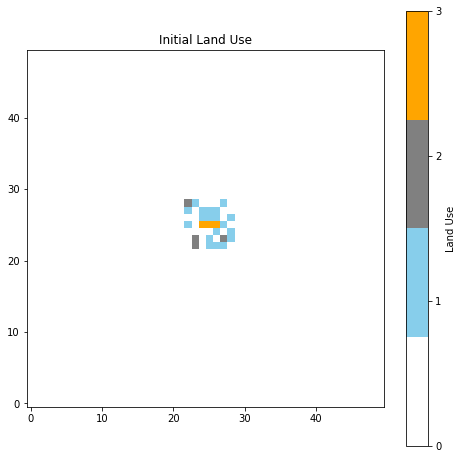

Running iteration 1...
Running iteration 2...
Running iteration 3...
Running iteration 4...
Running iteration 5...
Running iteration 6...
Running iteration 7...
Running iteration 8...
Running iteration 9...
Running iteration 10...
Running iteration 11...
Running iteration 12...
Running iteration 13...
Running iteration 14...
Running iteration 15...
Running iteration 16...
Running iteration 17...
Running iteration 18...
Running iteration 19...
Running iteration 20...
Running iteration 21...
Running iteration 22...
Running iteration 23...
Running iteration 24...
Running iteration 25...
Running iteration 26...
Running iteration 27...
Running iteration 28...
Running iteration 29...
Running iteration 30...
Running iteration 31...
Running iteration 32...
Running iteration 33...
Running iteration 34...
Running iteration 35...
Running iteration 36...
Running iteration 37...
Running iteration 38...
Running iteration 39...
Running iteration 40...
Running iteration 41...
Running iteration 42...
R

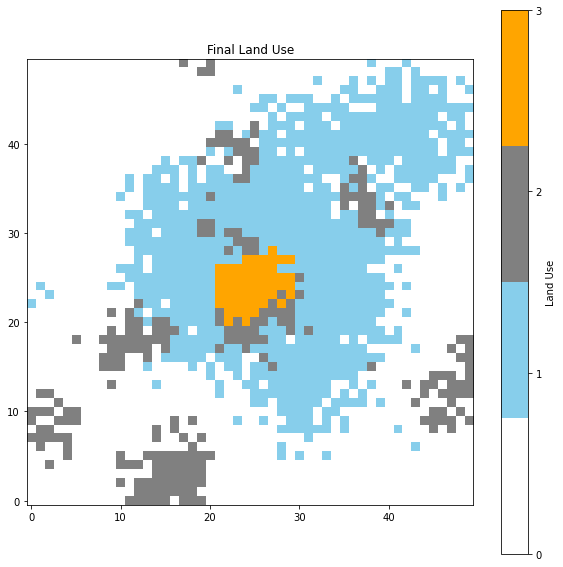

Simulation completed.

Running simulation with seed 24381...


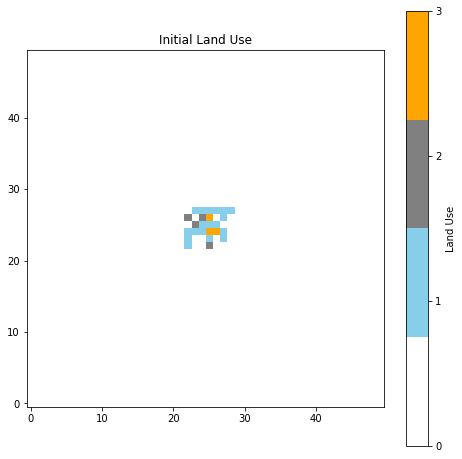

Running iteration 1...
Running iteration 2...
Running iteration 3...
Running iteration 4...
Running iteration 5...
Running iteration 6...
Running iteration 7...
Running iteration 8...
Running iteration 9...
Running iteration 10...
Running iteration 11...
Running iteration 12...
Running iteration 13...
Running iteration 14...
Running iteration 15...
Running iteration 16...
Running iteration 17...
Running iteration 18...
Running iteration 19...
Running iteration 20...
Running iteration 21...
Running iteration 22...
Running iteration 23...
Running iteration 24...
Running iteration 25...
Running iteration 26...
Running iteration 27...
Running iteration 28...
Running iteration 29...
Running iteration 30...
Running iteration 31...
Running iteration 32...
Running iteration 33...
Running iteration 34...
Running iteration 35...
Running iteration 36...
Running iteration 37...
Running iteration 38...
Running iteration 39...
Running iteration 40...
Running iteration 41...
Running iteration 42...
R

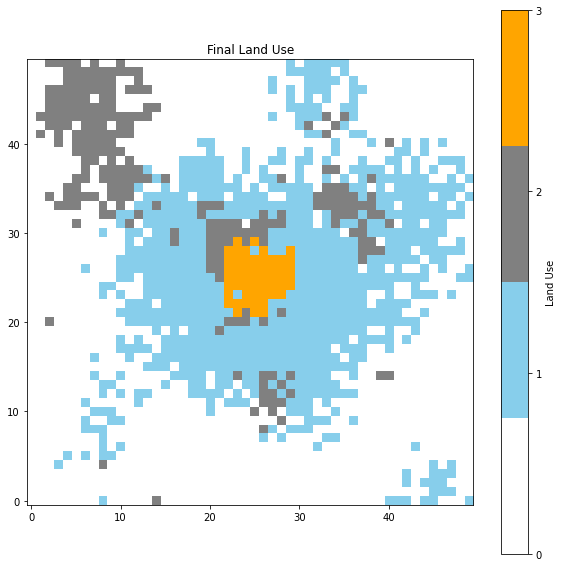

Simulation completed.

Running simulation with seed 12973...


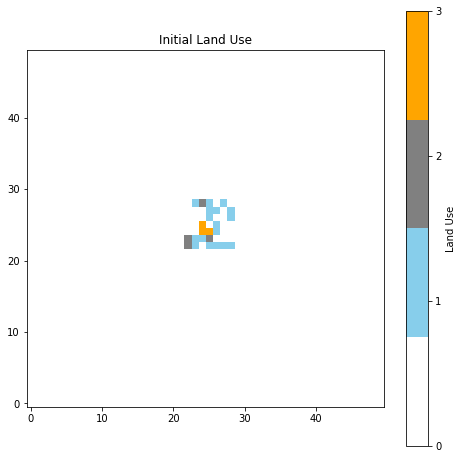

Running iteration 1...
Running iteration 2...
Running iteration 3...
Running iteration 4...
Running iteration 5...
Running iteration 6...
Running iteration 7...
Running iteration 8...
Running iteration 9...
Running iteration 10...
Running iteration 11...
Running iteration 12...
Running iteration 13...
Running iteration 14...
Running iteration 15...
Running iteration 16...
Running iteration 17...
Running iteration 18...
Running iteration 19...
Running iteration 20...
Running iteration 21...
Running iteration 22...
Running iteration 23...
Running iteration 24...
Running iteration 25...
Running iteration 26...
Running iteration 27...
Running iteration 28...
Running iteration 29...
Running iteration 30...
Running iteration 31...
Running iteration 32...
Running iteration 33...
Running iteration 34...
Running iteration 35...
Running iteration 36...
Running iteration 37...
Running iteration 38...
Running iteration 39...
Running iteration 40...
Running iteration 41...
Running iteration 42...
R

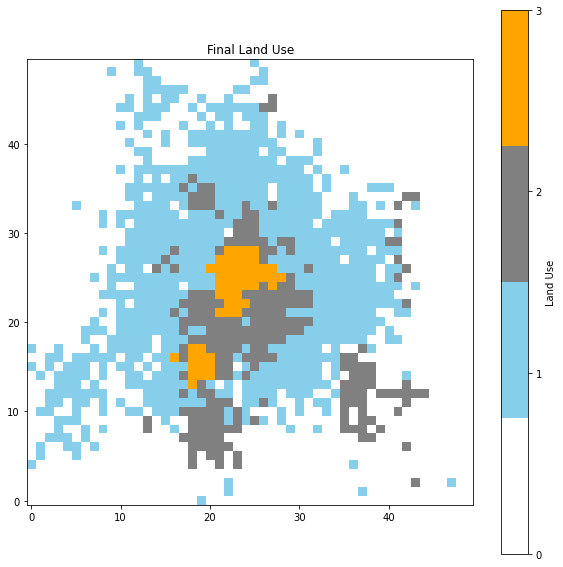

Simulation completed.

Running simulation with seed 10430...


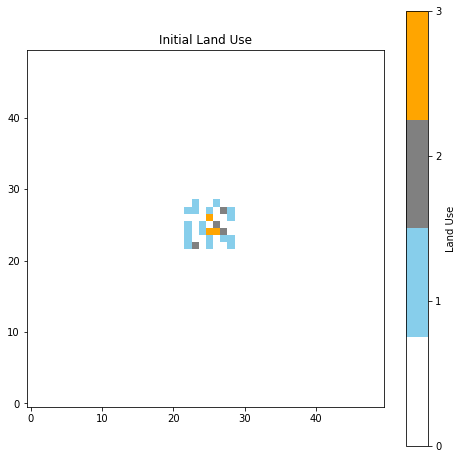

Running iteration 1...
Running iteration 2...
Running iteration 3...
Running iteration 4...
Running iteration 5...
Running iteration 6...
Running iteration 7...
Running iteration 8...
Running iteration 9...
Running iteration 10...
Running iteration 11...
Running iteration 12...
Running iteration 13...
Running iteration 14...
Running iteration 15...
Running iteration 16...
Running iteration 17...
Running iteration 18...
Running iteration 19...
Running iteration 20...
Running iteration 21...
Running iteration 22...
Running iteration 23...
Running iteration 24...
Running iteration 25...
Running iteration 26...
Running iteration 27...
Running iteration 28...
Running iteration 29...
Running iteration 30...
Running iteration 31...
Running iteration 32...
Running iteration 33...
Running iteration 34...
Running iteration 35...
Running iteration 36...
Running iteration 37...
Running iteration 38...
Running iteration 39...
Running iteration 40...
Running iteration 41...
Running iteration 42...
R

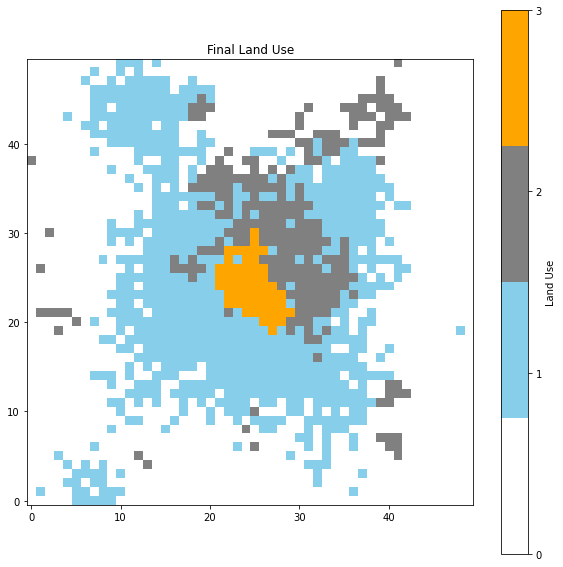

Simulation completed.

Running simulation with seed 40712...


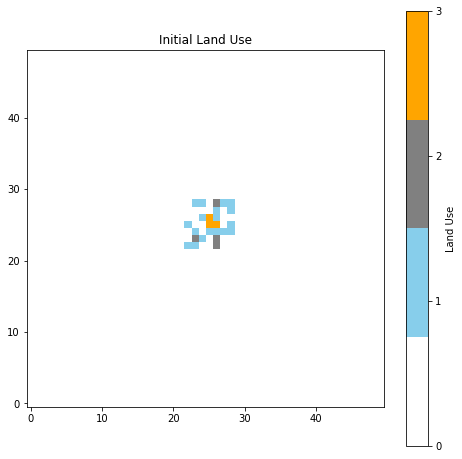

Running iteration 1...
Running iteration 2...
Running iteration 3...
Running iteration 4...
Running iteration 5...
Running iteration 6...
Running iteration 7...
Running iteration 8...
Running iteration 9...
Running iteration 10...
Running iteration 11...
Running iteration 12...
Running iteration 13...
Running iteration 14...
Running iteration 15...
Running iteration 16...
Running iteration 17...
Running iteration 18...
Running iteration 19...
Running iteration 20...
Running iteration 21...
Running iteration 22...
Running iteration 23...
Running iteration 24...
Running iteration 25...
Running iteration 26...
Running iteration 27...
Running iteration 28...
Running iteration 29...
Running iteration 30...
Running iteration 31...
Running iteration 32...
Running iteration 33...
Running iteration 34...
Running iteration 35...
Running iteration 36...
Running iteration 37...
Running iteration 38...
Running iteration 39...
Running iteration 40...
Running iteration 41...
Running iteration 42...
R

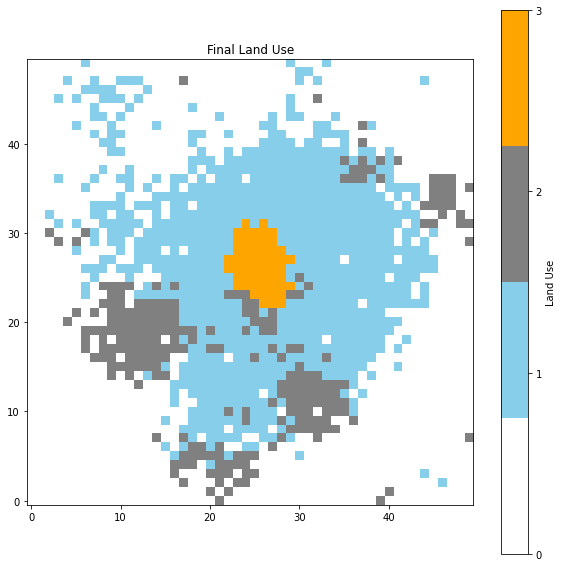

Simulation completed.

Running simulation with seed 10151...


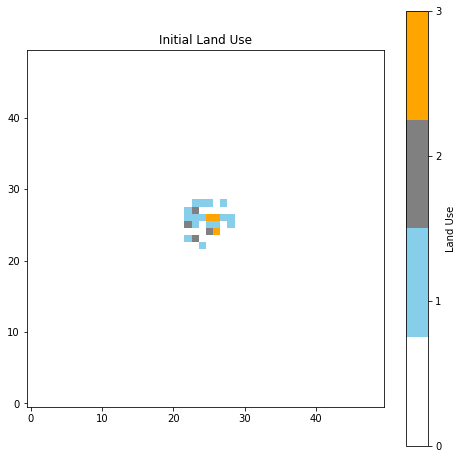

Running iteration 1...
Running iteration 2...
Running iteration 3...
Running iteration 4...
Running iteration 5...
Running iteration 6...
Running iteration 7...
Running iteration 8...
Running iteration 9...
Running iteration 10...
Running iteration 11...
Running iteration 12...
Running iteration 13...
Running iteration 14...
Running iteration 15...
Running iteration 16...
Running iteration 17...
Running iteration 18...
Running iteration 19...
Running iteration 20...
Running iteration 21...
Running iteration 22...
Running iteration 23...
Running iteration 24...
Running iteration 25...
Running iteration 26...
Running iteration 27...
Running iteration 28...
Running iteration 29...
Running iteration 30...
Running iteration 31...
Running iteration 32...
Running iteration 33...
Running iteration 34...
Running iteration 35...
Running iteration 36...
Running iteration 37...
Running iteration 38...
Running iteration 39...
Running iteration 40...
Running iteration 41...
Running iteration 42...
R

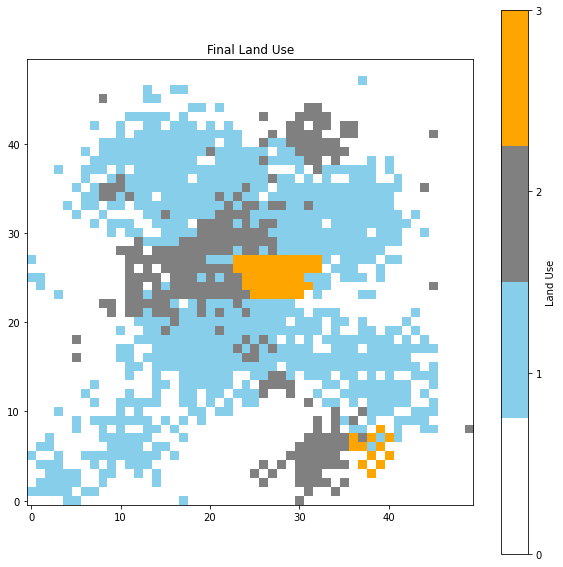

Simulation completed.

Running simulation with seed 48186...


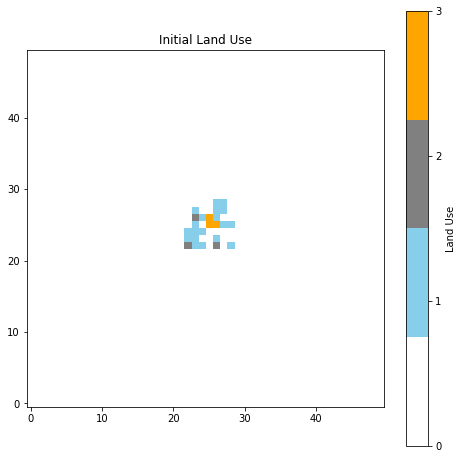

Running iteration 1...
Running iteration 2...
Running iteration 3...
Running iteration 4...
Running iteration 5...
Running iteration 6...
Running iteration 7...
Running iteration 8...
Running iteration 9...
Running iteration 10...
Running iteration 11...
Running iteration 12...
Running iteration 13...
Running iteration 14...
Running iteration 15...
Running iteration 16...
Running iteration 17...
Running iteration 18...
Running iteration 19...
Running iteration 20...
Running iteration 21...
Running iteration 22...
Running iteration 23...
Running iteration 24...
Running iteration 25...
Running iteration 26...
Running iteration 27...
Running iteration 28...
Running iteration 29...
Running iteration 30...
Running iteration 31...
Running iteration 32...
Running iteration 33...
Running iteration 34...
Running iteration 35...
Running iteration 36...
Running iteration 37...
Running iteration 38...
Running iteration 39...
Running iteration 40...
Running iteration 41...
Running iteration 42...
R

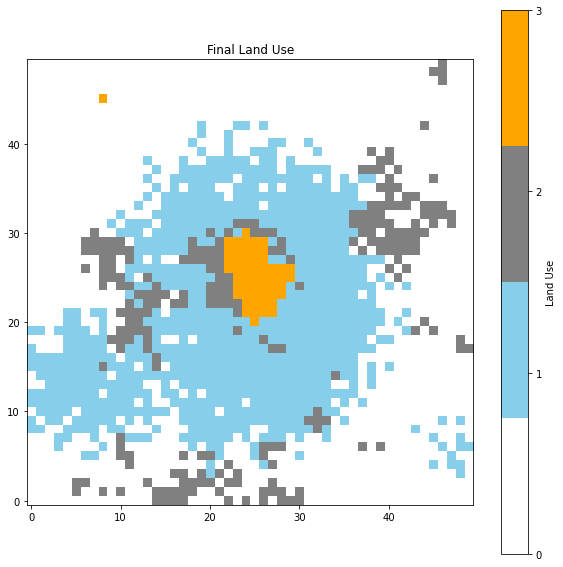

Simulation completed.

Running simulation with seed 22592...


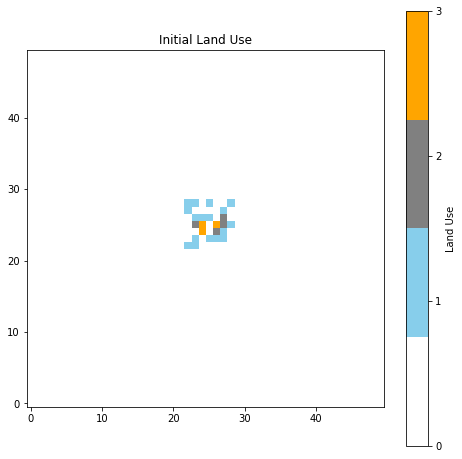

Running iteration 1...
Running iteration 2...
Running iteration 3...
Running iteration 4...
Running iteration 5...
Running iteration 6...
Running iteration 7...
Running iteration 8...
Running iteration 9...
Running iteration 10...
Running iteration 11...
Running iteration 12...
Running iteration 13...
Running iteration 14...
Running iteration 15...
Running iteration 16...
Running iteration 17...
Running iteration 18...
Running iteration 19...
Running iteration 20...
Running iteration 21...
Running iteration 22...
Running iteration 23...
Running iteration 24...
Running iteration 25...
Running iteration 26...
Running iteration 27...
Running iteration 28...
Running iteration 29...
Running iteration 30...
Running iteration 31...
Running iteration 32...
Running iteration 33...
Running iteration 34...
Running iteration 35...
Running iteration 36...
Running iteration 37...
Running iteration 38...
Running iteration 39...
Running iteration 40...
Running iteration 41...
Running iteration 42...
R

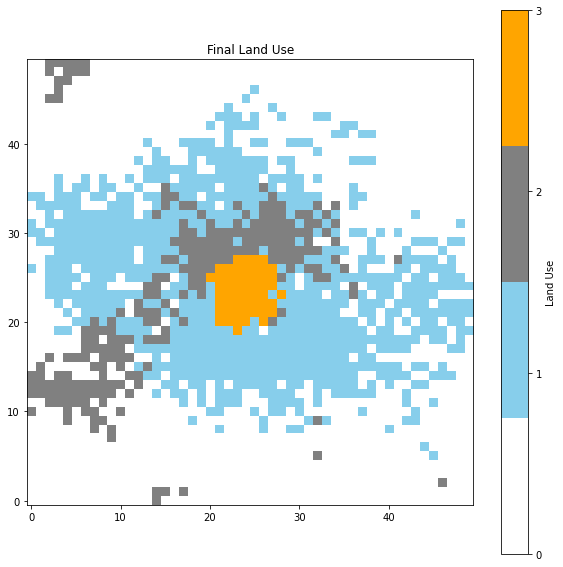

Simulation completed.

Running simulation with seed 27099...


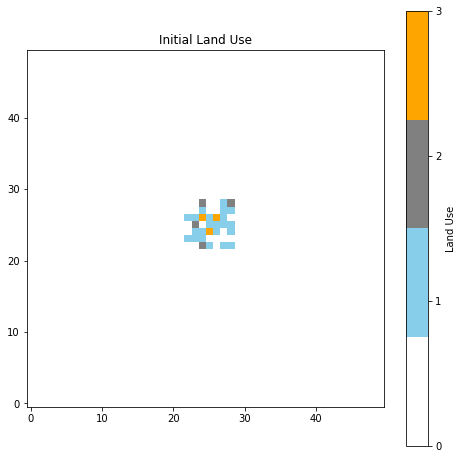

Running iteration 1...
Running iteration 2...
Running iteration 3...
Running iteration 4...
Running iteration 5...
Running iteration 6...
Running iteration 7...
Running iteration 8...
Running iteration 9...
Running iteration 10...
Running iteration 11...
Running iteration 12...
Running iteration 13...
Running iteration 14...
Running iteration 15...
Running iteration 16...
Running iteration 17...
Running iteration 18...
Running iteration 19...
Running iteration 20...
Running iteration 21...
Running iteration 22...
Running iteration 23...
Running iteration 24...
Running iteration 25...
Running iteration 26...
Running iteration 27...
Running iteration 28...
Running iteration 29...
Running iteration 30...
Running iteration 31...
Running iteration 32...
Running iteration 33...
Running iteration 34...
Running iteration 35...
Running iteration 36...
Running iteration 37...
Running iteration 38...
Running iteration 39...
Running iteration 40...
Running iteration 41...
Running iteration 42...
R

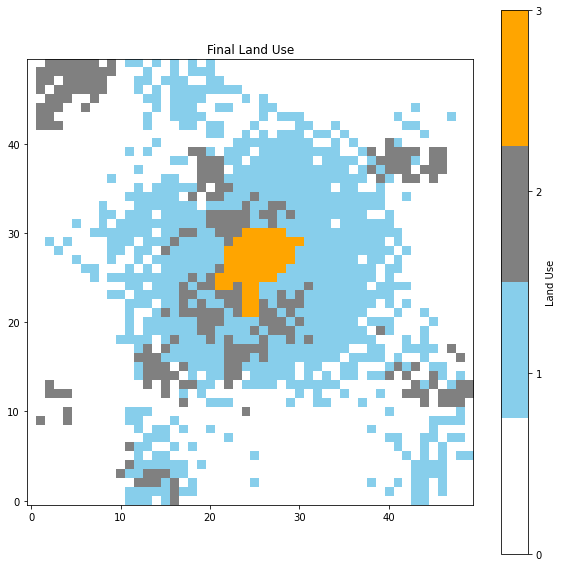

Simulation completed.

Running simulation with seed 55714...


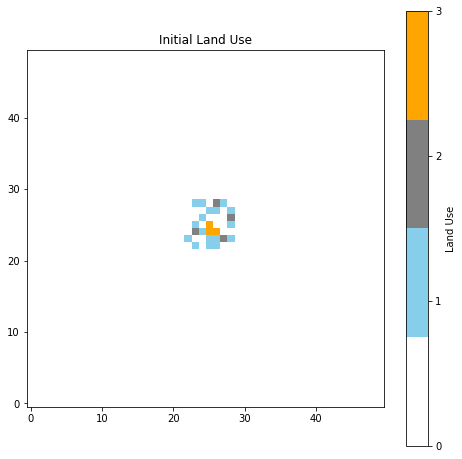

Running iteration 1...
Running iteration 2...
Running iteration 3...
Running iteration 4...
Running iteration 5...
Running iteration 6...
Running iteration 7...
Running iteration 8...
Running iteration 9...
Running iteration 10...
Running iteration 11...
Running iteration 12...
Running iteration 13...
Running iteration 14...
Running iteration 15...
Running iteration 16...
Running iteration 17...
Running iteration 18...
Running iteration 19...
Running iteration 20...
Running iteration 21...
Running iteration 22...
Running iteration 23...
Running iteration 24...
Running iteration 25...
Running iteration 26...
Running iteration 27...
Running iteration 28...
Running iteration 29...
Running iteration 30...
Running iteration 31...
Running iteration 32...
Running iteration 33...
Running iteration 34...
Running iteration 35...
Running iteration 36...
Running iteration 37...
Running iteration 38...
Running iteration 39...
Running iteration 40...
Running iteration 41...
Running iteration 42...
R

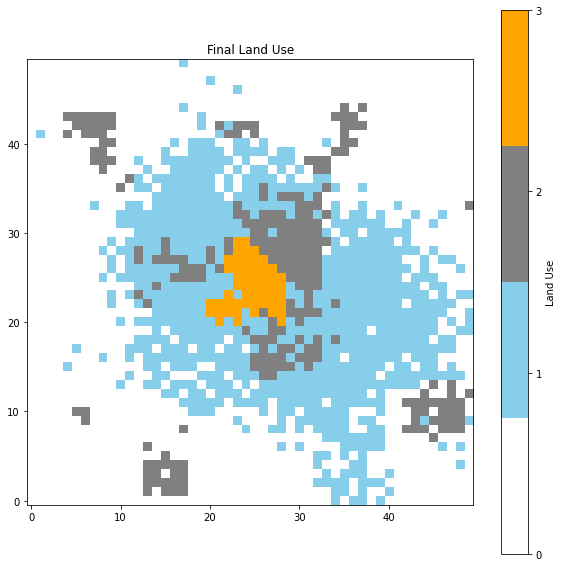

Simulation completed.



In [20]:
def run_simulation_multiple(grid, weights_table, alpha, growth_rates, radius, seed, num_iterations):
    np.random.seed(seed)
    
    grid_size = grid.shape[0]



    for iteration in range(num_iterations):
        print(f"Running iteration {iteration+1}...")
        transition_potentials = calculate_transition_potentials(grid, alpha, weights_table, radius)

        highest_potentials = {}
        for i in range(grid_size):
            for j in range(grid_size):
                if grid[i, j] == states['V']:
                    potential_states = ['H', 'I', 'C']
                elif grid[i, j] == states['H']:
                    potential_states = ['I', 'C']
                elif grid[i, j] == states['I']:
                    potential_states = ['C']
                else:
                    potential_states = []
                    
                if potential_states:
                    highest_potentials[(i, j)] = max(potential_states, key=lambda state: transition_potentials[i, j, states[state]])

        for new_state_key in sorted(states, key=lambda k: states[k], reverse=True):
            new_state = states[new_state_key]
            if new_state_key != 'V':
                num_to_convert = int(grid_size * grid_size * growth_rates[new_state_key])
                potential_cells = [(i, j) for i, j in highest_potentials.keys() if highest_potentials[(i, j)] == new_state_key]
                potential_cells.sort(key=lambda cell: transition_potentials[cell[0], cell[1], states[highest_potentials[cell]]], reverse=True)
                
                for cell in potential_cells[:num_to_convert]:
                    
                    grid[cell] = new_state

        

    plt.figure(figsize=(10, 10))
    cmap = plt.cm.colors.ListedColormap(['white', 'skyblue', 'grey', 'orange'])
    plt.imshow(grid, cmap=cmap, origin='lower', vmin=0, vmax=3)
    plt.colorbar(ticks=[0, 1, 2, 3], label='Land Use')
    plt.title('Final Land Use')
    plt.show()

# make seed to be 10 random integers from 0 to 100000
seeds = np.random.randint(0, 100000, 10)

growth_rates = {
    'H': 0.007,  
    'I': 0.002,
    'C': 0.0005,
}
num_iterations = 50

for seed in seeds:
    print(f"Running simulation with seed {seed}...")
    new_grid = initial_land_use(seed_number=seed, grid_size=grid_size, plot=True)
    run_simulation_multiple(new_grid, weights_table, alpha=2.5, growth_rates=growth_rates, radius=6, seed=seed, num_iterations=num_iterations)
    print("Simulation completed.\n")

